# Importing Libraries

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chosen Numbers for Binary Classification

In [140]:
number_one = 6 # UD ID
number_two = 1

# Training and Test Sets Data Path

In [141]:
train_data_path = 'DigitsTraining.csv'
test_data_path =  'DigitsTesting.csv'

# Create an Image from Pixel Data

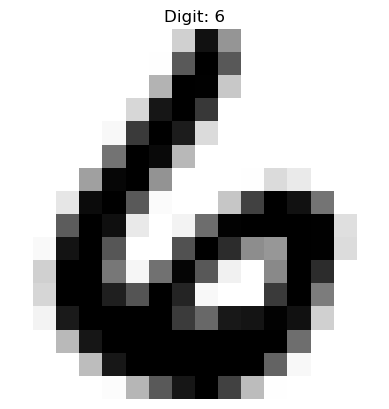

In [142]:
digits_training_df = pd.read_csv(train_data_path, header=None)
digits_testing_df = pd.read_csv(test_data_path, header=None)

first_digit_label = digits_training_df.iloc[0, 0]
first_digit_pixels = digits_training_df.iloc[0, 1:].values

# Reshape the pixel values (256) into a 16x16 grid
first_digit_image = first_digit_pixels.reshape(16, 16)

# Plot the image
plt.imshow(first_digit_image, cmap='gray')
plt.title(f'Digit: {int(first_digit_label)}')
plt.axis('off')
plt.show()

# Filtered Datasets Based on Chosen Numbers

In [143]:
train_data = digits_training_df[digits_training_df.iloc[:, 0].isin([number_one, number_two])]
test_data = digits_testing_df[digits_testing_df.iloc[:, 0].isin([number_one, number_two])]

In [144]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.8155,0.0690,...,0.3480,0.0885,0.0000,0.2590,0.7370,0.9955,1.0,1.0,1.0,1.0
5,6,1.0,1.0,1.0,1.0,1.0,0.6985,0.0085,0.7675,1.0000,...,0.0985,0.4925,0.9310,0.9355,0.7185,1.0000,1.0,1.0,1.0,1.0
7,1,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.2450,0.6065,...,0.8270,0.1670,0.3495,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
9,1,1.0,1.0,1.0,1.0,1.0,1.0000,1.0000,0.9545,0.0995,...,1.0000,0.6660,0.1325,0.3100,1.0000,1.0000,1.0,1.0,1.0,1.0
12,1,1.0,1.0,1.0,1.0,1.0,1.0000,0.9990,0.1935,0.6925,...,0.9840,0.4040,0.4205,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0


In [145]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
3,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0
4,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9290,0.553,...,0.0495,0.0495,0.0495,0.3550,0.6845,0.9335,1.0,1.0,1.0,1.0
8,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8805,0.281,...,0.0000,0.0000,0.1605,0.5085,0.9535,1.0000,1.0,1.0,1.0,1.0
10,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,0.963,...,0.1025,0.0000,0.0000,0.0460,0.3995,0.8000,1.0,1.0,1.0,1.0


# Extract Features from The Images: Average Intensity and Symmetry

 ## Average Intensity:
 ### **Definition**: 
The average intensity refers to the mean pixel value across all pixels in the image. Since the image is grayscale, each pixel value represents the intensity (brightness) of that pixel. In a 16x16 image, this would be the mean of all 256 pixel values.


### **How to Calculate**: 
Sum all pixel values and divide by the number of pixels (256 for a 16x16 image).

##  Symmetry
1. **Overall Symmetry**:
   $S = \frac{S_v + S_h}{2}$
   - This means the symmetry score \( S \) is the average of the vertical and horizontal symmetry values.

2. **Vertical Symmetry $ S_v $**:
   $S_v = \frac{1}{256} \sum_{i=1}^{16} \sum_{j=1}^{16} | I[i, j] - I_{fv}[i, j] |$
   - $ I[i, j] $ is the pixel value at position $(i, j)$ in the original image.
   - $ I_{fv}[i, j] $ is the pixel value at position $(i, j)$ in the vertically flipped version of the image.
   - The absolute difference between these pixel values is calculated and summed over all pixels, and then divided by 256 (the total number of pixels in a 16x16 image) to normalize the result.


3. **Horizontal Symmetry $ S_h $**:
    $S_h = \frac{1}{256} \sum_{i=1}^{16} \sum_{j=1}^{16} | I[i, j] - I_{fh}[i, j] |$
   - $ I_{fh}[i, j] $ is the pixel value at position $(i, j)$ in the horizontally flipped version of the image.
   - Similar to $ S_v $, you calculate the absolute difference between corresponding pixel values in the original and horizontally flipped images.
### To calculate this:
1. **Vertical Symmetry**: 
   - Flip the image vertically.
   - Compare each pixel in the original image to its corresponding pixel in the vertically flipped image.
   - Take the absolute difference, sum these differences, and normalize by dividing by 256.

2. **Horizontal Symmetry**: 
   - Flip the image horizontally.
   - Compare each pixel in the original image to its corresponding pixel in the horizontally flipped image.
   - Again, take the absolute difference, sum these differences, and normalize by dividing by 256.

In [146]:
def extract_features(image_row):
    # Get the image (16x16)
    image = image_row[1:].values.reshape(16, 16)

    # Average intensity
    avg_intensity = np.mean(image)
    
    # Vertical symmetry
    vertical_flipped_image = np.flipud(image)
    
    Sv = np.sum(np.abs(image - vertical_flipped_image)) / 256
    
    # Horizontal symmetry
    horizontal_flipped_image = np.fliplr(image)
    Sh = np.sum(np.abs(image - horizontal_flipped_image)) / 256
    
    # Overall symmetry
    symmetry = (Sv + Sh) / 2
    
    return np.array([avg_intensity, symmetry])

# Prepare training and testing features

In [147]:
X_train = np.array([extract_features(row) for _, row in train_data.iterrows()])
y_train = np.where(train_data.iloc[:, 0] == number_two, 1, -1)  # Assuming binary classification for digits number_one and number_two

X_test = np.array([extract_features(row) for _, row in test_data.iterrows()])
y_test = np.where(test_data.iloc[:, 0] == number_two, 1, -1)  # Binary classification for digits number_one and number_two


In [148]:
X_train

array([[0.6589082 , 0.28305859],
       [0.78721484, 0.23258594],
       [0.87695703, 0.04424219],
       ...,
       [0.80489648, 0.07612109],
       [0.8311543 , 0.03639062],
       [0.7237793 , 0.05726563]])

0.658908203125


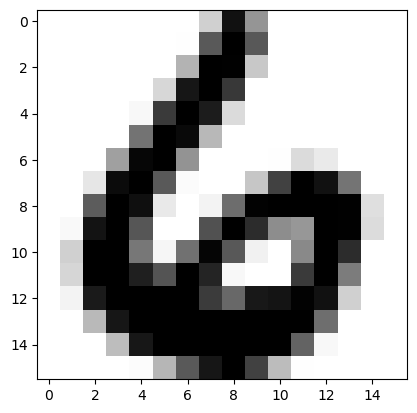

In [149]:
plt.imshow(train_data.iloc[0, 1:].values.reshape(16, 16), cmap='gray')
print(np.mean(train_data.iloc[0, 1:].values.reshape(16, 16)))

0.78721484375


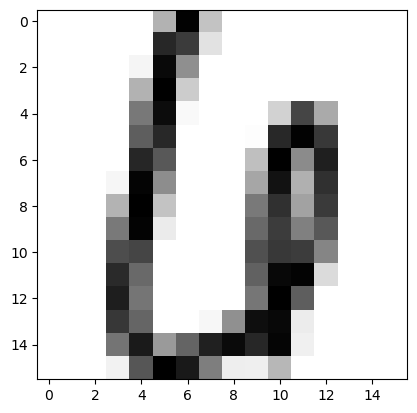

In [150]:
plt.imshow(train_data.iloc[1, 1:].values.reshape(16, 16), cmap='gray')
print(np.mean(train_data.iloc[1, 1:].values.reshape(16, 16)))

In [151]:
y_train

array([-1, -1,  1, ...,  1,  1,  1])

In [152]:
X_test

array([[0.73486719, 0.318875  ],
       [0.73515039, 0.25978906],
       [0.65466211, 0.41990234],
       [0.67724219, 0.33894531],
       [0.73554297, 0.26926953],
       [0.84006641, 0.108875  ],
       [0.72613281, 0.30148438],
       [0.65025   , 0.26911719],
       [0.73772461, 0.29505469],
       [0.87539062, 0.02965234],
       [0.78088281, 0.05653125],
       [0.7552207 , 0.15660156],
       [0.77319336, 0.22040234],
       [0.8944375 , 0.01366016],
       [0.84876758, 0.01617188],
       [0.79811133, 0.05545703],
       [0.8233125 , 0.11936719],
       [0.63807422, 0.39271875],
       [0.62533398, 0.36592188],
       [0.80384766, 0.21247266],
       [0.78239063, 0.27746875],
       [0.78464648, 0.21179687],
       [0.80670703, 0.07243359],
       [0.79707227, 0.03417188],
       [0.83350586, 0.22682031],
       [0.60977344, 0.374375  ],
       [0.66469922, 0.29160547],
       [0.77375   , 0.24741797],
       [0.86814062, 0.06376172],
       [0.83247266, 0.03394141],
       [0.

In [153]:
y_test

array([-1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1

# Illustration of Features

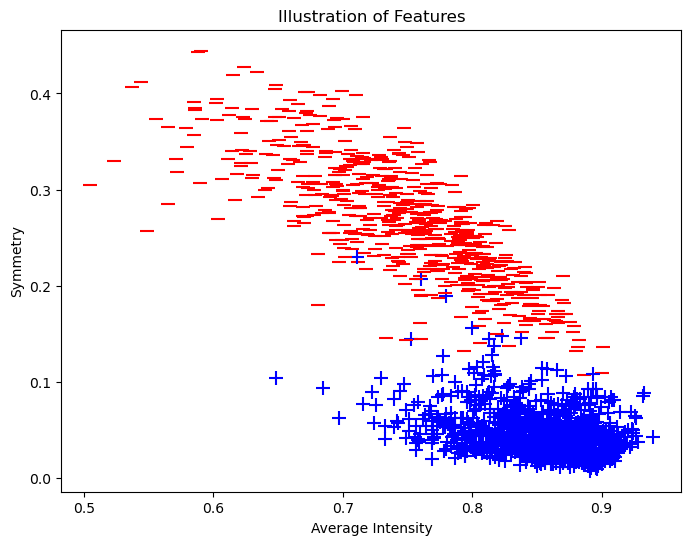

In [154]:
plt.figure(figsize=(8, 6))
for i in range(len(y_train)):
    if y_train[i] == 1:
        plt.scatter(X_train[i, 0], X_train[i, 1], marker='+', color='blue', s=100)
    else:
        plt.scatter(X_train[i, 0], X_train[i, 1], marker='_', color='red', s=100)
plt.title(f"Illustration of Features")
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.show()

# Function to plot decision boundary and data points

In [155]:
def plot_decision_boundary(X, y, weights, bias, iteration, misclassified_points=None):
    plt.figure(figsize=(8, 6))
    
    # Plot data points
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], marker='+', color='blue', s=100)
        else:
            plt.scatter(X[i, 0], X[i, 1], marker='_', color='red', s=100)
    
    # Plot misclassified points
    if misclassified_points is not None:
        plt.scatter(X[misclassified_points, 0], X[misclassified_points, 1], facecolors='none', edgecolors='green', s=150, linewidths=2)
    
    # Plot the decision boundary (line)
    if weights[1] != 0:  # Avoid division by zero
        x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
        y_vals = -(weights[0] * x_vals + bias) / weights[1]
        plt.plot(x_vals, y_vals, 'magenta', label='Decision Boundary')

    # Titles and labels
    plt.title(f"Iteration {iteration}: Decision Boundary")
    plt.xlabel('Average Intensity')
    plt.ylabel('Symmetry')
    plt.legend(loc='upper left')
    plt.show()

# Function to calculate the classification error
You're right to question whether the $E_{in}$ and $E_{out}$ calculations were implemented properly, based on the slide you provided. Let's carefully revisit the error definitions and compare them with the code implementation:

### Error Definitions:

- **In-sample error $E_{in}$**: This is the average error on the training set. It’s calculated as:
  $E_{in}(h) = \frac{1}{N} \sum_{n=1}^{N} e(h(x_n), f(x_n))$
  Where:
  -  $N$ is the number of training samples.
  -  $h(x_n)$ is the hypothesis (prediction) for the $n$-th training example.
  -  $f(x_n)$ is the actual label for the $n$-th training example.
  -  $e$ represents a misclassification: if the prediction $h(x_n) \neq f(x_n)$, then there is an error.

- **Out-of-sample error $E_{out}$**: This is the expected error on unseen data (test set), which is calculated similarly to $E_{in}$ but on the test data:
  $E_{out}(h) = \frac{1}{N_{\text{test}}} \sum_{n=1}^{N_{\text{test}}} e(h(x_n), f(x_n))$

In [156]:
def calculate_error(X, y, weights, bias):
    predictions = np.sign(np.dot(X, weights) + bias)
    return np.mean(predictions != y)

# Pocket Algorithm

In [157]:
def pocket_algorithm(X_train, y_train, X_test, y_test, max_iterations=200):
    # Initialize weights and bias
    weights = np.zeros(X_train.shape[1])
    pocket_weights = np.copy(weights)  # Initialize pocket weights
    bias = 0
    pocket_bias = bias  # Initialize pocket bias
    
    iteration = 0
    num_samples = len(y_train)
    
    E_in_values = []
    E_out_values = []
    
    # Track the best (lowest) in-sample error
    best_E_in = calculate_error(X_train, y_train, weights, bias)
    
    # Learning loop
    while iteration < max_iterations:
        misclassified_points = []
        
        # Calculate errors
        E_in = calculate_error(X_train, y_train, weights, bias)
        E_out = calculate_error(X_test, y_test, weights, bias)
        
        E_in_values.append(E_in)
        E_out_values.append(E_out)
        
        # Update the pocket if the current weights perform better
        if E_in < best_E_in:
            best_E_in = E_in
            pocket_weights = np.copy(weights)
            pocket_bias = bias
        
        print(f"Iteration {iteration} - Weights: {weights}, Bias: {bias}, Best E_in: {best_E_in}")
        
        for i in range(num_samples):
            if y_train[i] * (np.dot(X_train[i], weights) + bias) <= 0:
                # Update the weights and bias for misclassified point
                weights += y_train[i] * X_train[i]
                bias += y_train[i]
                misclassified_points.append(i)
        
        # Stop if no misclassified points
        if len(misclassified_points) == 0:
            print("Converged!")
            break
        
        iteration += 1
    
    # Return the best weights (pocket weights) and bias found during the process
    return pocket_weights, pocket_bias, E_in_values, E_out_values

# Prediction function

In [158]:
def predict(X, weights, bias):
    return np.sign(np.dot(X, weights) + bias)

# Train the model

Iteration 0 - Weights: [0. 0.], Bias: 0, Best E_in: 1.0
Iteration 1 - Weights: [  2.4793418  -12.82455859], Bias: 0, Best E_in: 0.017974835230677052
Iteration 2 - Weights: [  2.33687305 -14.04601953], Bias: 0, Best E_in: 0.009586578789694428
Iteration 3 - Weights: [  2.74219922 -14.34021094], Bias: 1, Best E_in: 0.009586578789694428
Iteration 4 - Weights: [  1.81228906 -15.95888281], Bias: 1, Best E_in: 0.009586578789694428
Iteration 5 - Weights: [  2.28422852 -16.56975781], Bias: 2, Best E_in: 0.009586578789694428
Iteration 6 - Weights: [  2.09622656 -16.92435547], Bias: 2, Best E_in: 0.009586578789694428
Iteration 7 - Weights: [  1.5097832  -17.77169531], Bias: 2, Best E_in: 0.009586578789694428
Iteration 8 - Weights: [  1.03997852 -18.77905469], Bias: 2, Best E_in: 0.009586578789694428
Iteration 9 - Weights: [  1.55035742 -19.30785547], Bias: 3, Best E_in: 0.009586578789694428
Iteration 10 - Weights: [  1.25312891 -19.60924219], Bias: 3, Best E_in: 0.009586578789694428
Iteration 11 

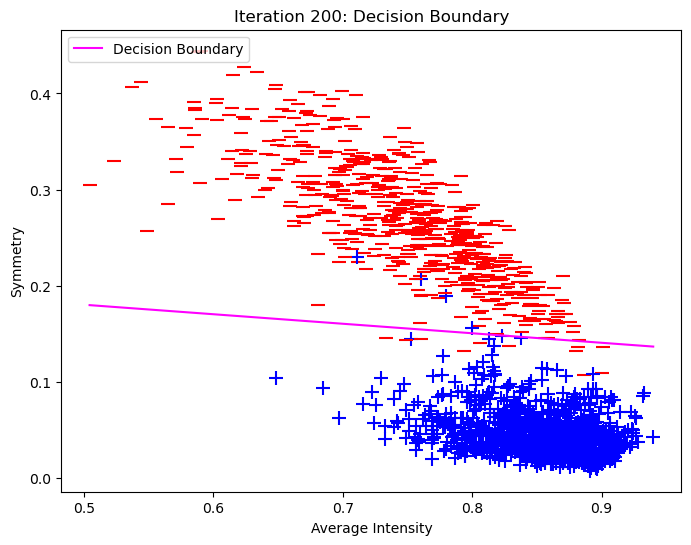

In [159]:
weights, bias, E_in_values, E_out_values = pocket_algorithm(X_train, y_train, X_test, y_test)
plot_decision_boundary(X_train, y_train, weights, bias, 200)

# Calculate Eout on the test set

In [160]:
y_pred_test = predict(X_test, weights, bias)
Eout = np.mean(y_pred_test != y_test)

print("Out-of-sample error (Eout):", Eout)

Out-of-sample error (Eout): 0.02534562211981567


# Plot the in-sample and out-of-sample error over iterations

/tmp/ipykernel_4831/2687744610.py:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 0.5)


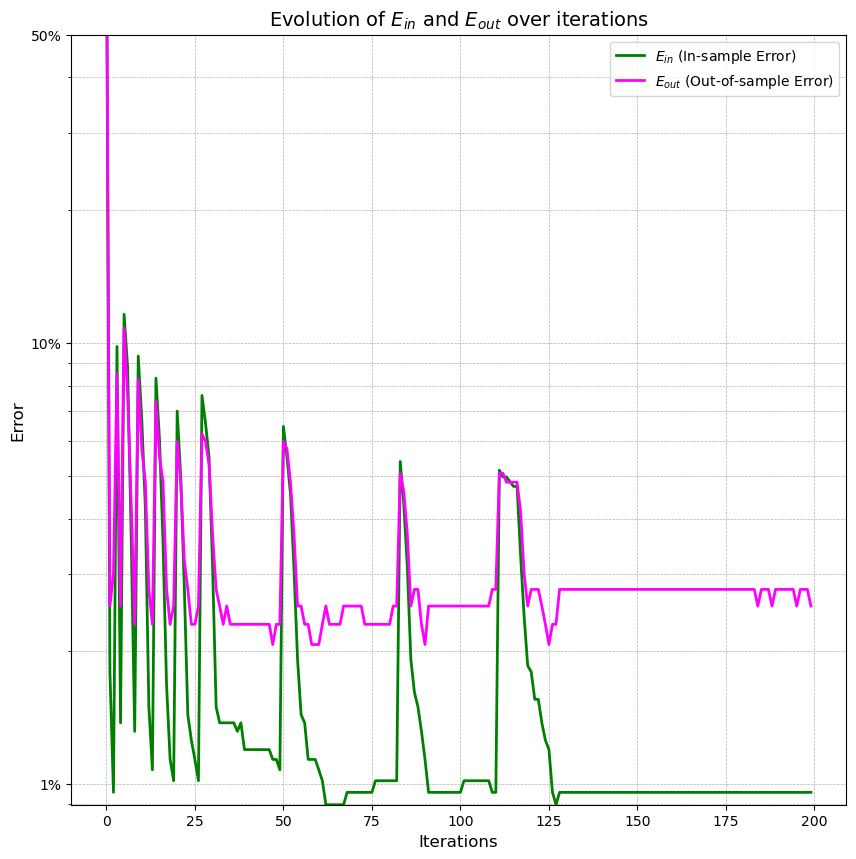

In [161]:
plt.figure(figsize=(10, 10))

plt.plot(E_in_values, label=r'$E_{in}$ (In-sample Error)', color='green', linewidth=2)
plt.plot(E_out_values, label=r'$E_{out}$ (Out-of-sample Error)', color='magenta', linewidth=2)

plt.yscale('log')
plt.yticks([0, 0.01, 0.1, 0.5], ['0%', '1%', '10%', '50%'])
plt.ylim(0, 0.5)

plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title(r'Evolution of $E_{in}$ and $E_{out}$ over iterations', fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(loc='upper right', fontsize=10)
plt.show()